# PyTorch Workflow

In [20]:
covered_topics = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to the data(training)",
    4: "making predictions and evaluating a model(inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

covered_topics

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [21]:
# Importing the modules
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check the PyTorch Version
torch.__version__

'2.5.1+cu121'

## Data (Preparing and Loading)

Data can be almost anything in machine learning...
* Excel Spreadsheet
* Images
* Videos
* Audios
* Text
* DNA

Machine Learning is game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in the numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.
We'll use the linear regression formula to make a straight line with *known* **parameters**.

In [22]:
# create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
len(X), len(y)

(50, 50)

### Splitting the data in training and test splits (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [24]:
# Creat a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test), 

(40, 40, 10, 10)

Visualizing the Data

In [25]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and  compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in red
    plt.scatter(test_data, test_labels, c="r", s=4, label="Testing Data")

    # Are there predictions:
    if predictions is not None:
        # Plot the predictions
        plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")
    
    plt.legend({"size": 14})

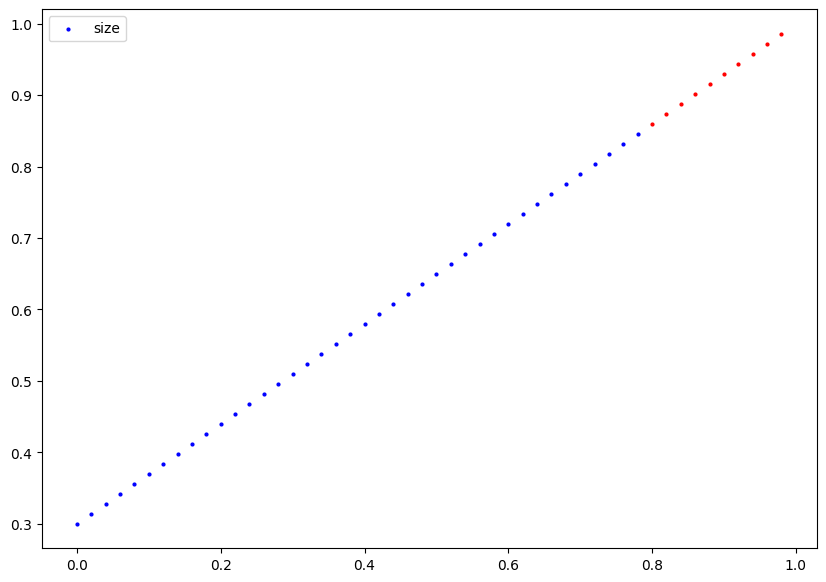

In [26]:
plot_predictions()

## Building a Model
My First PyTorch Model!

In [28]:
# Creating a Linear Regression Model Class
class linearRegressionModel(nn.Module): # <-  almost everything in PyTorch is inherited from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, 
                                               requires_grad=True, 
                                               dtype=torch.float))
        
        self.bias = nn.Parameter(torch.rand(1, 
                                            requires_grad=True,
                                            dtype = torch.float))
        
        # Forward method to define the computation in the model
        def forward(self, X: torch.Tensor) -> torch.Tensor:  # <-  x is the input data
            return self.weights * X + self.bias  # this is the linear regression formula


### PyTorch model building essentials
* `torch.nn` - Contains all the building for computational graphs (a neural network can be considered as a computational graph)
* `torch.nn.Parameter` - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural networks modules, if you subclass it, you should overwrite forward()
* `torch.optim` - This is where all the optimizers in PyTorch live, they will help with graident descent 
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in forward computation.

### Checking the contents of our PyTorch Models
Now we've created a model, let's see what's inside...
We can check our model parameters or what's inside our mode using `.parameters()`

In [31]:
# Create a random seed
torch.manual_seed(42)

# Create and instance of the model (this is a subclass of the nn.module)
model_0 = linearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

### Making predictions using `torch.inference_model()`
To check our models predictive power, let's see how well it predicts `y_test` on `X_test`.